# Assignment 1 by: Christian Nieves (s4005338)

# Task 1: Data Preparation


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in the csv file
df = pd.read_csv('A1data.csv')

In [5]:
# Data preperation
# Clean all cells by removing leading and trailing whitespace

for column in df.columns:
    # Check if the column is a string (object for pandas)
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()

In [6]:
# Error 1: Missing values.

# There are missing values/empty spaces, which can be replaced with 0
df.replace(r'^\s*$', 0, regex=True, inplace=True)
df.fillna(0, inplace=True)


In [7]:
# Error 2: Duplicate Rows
# Drop duplicate rows
df = df.drop_duplicates()


In [8]:
# Error 3: Data Entry Error

# Incorrect gender "MMM" value, replace with male
df['Gender'] = df['Gender'].replace('MMM', "Male")

# Incorrect year "3018" value, replace with 2018
df['Year'] = df['Year'].replace('3018', '2018')


In [9]:
# Error 4: Inconsistency

# Year format is inconsistent
# Extract the first 4 digits, then update df with these 4 digits. 
df['Year'] = df['Year'].str.extract(r'(\d{4})')




In [10]:
# Save the cleaned and prepared data to a clean csv file
df.to_csv('s4005338-cleaned-A1data.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 

In [11]:
# Code goes after this line by adding cells


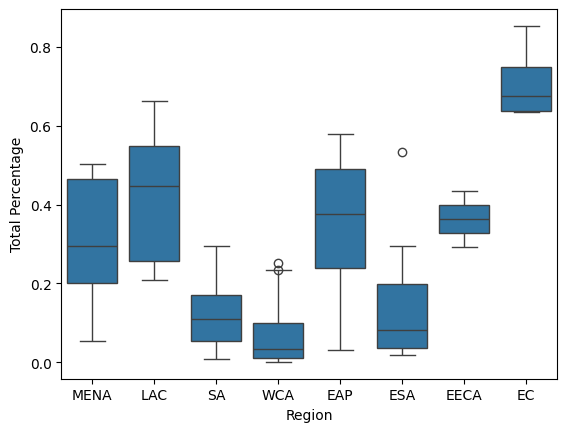

Region
EAP     0.3760
EC      0.6760
EECA    0.3640
ESA     0.0820
LAC     0.4480
MENA    0.2945
SA      0.1095
WCA     0.0350
Name: Total, dtype: float64


In [12]:
# Read in the clean file
df = pd.read_csv('s4005338-cleaned-A1data.csv')

# Create boxplot for Region against Total
sns.boxplot(data=df, x='Region', y='Total')

# Set labels and show plot
plt.xlabel('Region')
plt.ylabel('Total Percentage')
plt.show()

# Group by region, and calculate the median of each region
medians = df.groupby('Region')['Total'].median()
print(medians)

## Task 2.2 

In [13]:
# Code goes after this line by adding cells


In [14]:
# Read in the clean file
df = pd.read_csv('s4005338-cleaned-A1data.csv')

# Find the mean percentage of gender and skill 5
skill5Mean = df.groupby('Gender')['Skill 5'].mean()
print("Mean percentages for skill5  by gender:")
print(skill5Mean)

# Top 3 countries for male and female
topMaleCountries = df[df['Gender'] == 'Male'].sort_values(by='Skill 5', ascending=False).head(3)
topFemaleCountries = df[df['Gender'] == 'Female'].sort_values(by='Skill 5', ascending=False).head(3)

print("\nTop 3 countries - male")
print(topMaleCountries[['Country', 'Skill 5']])
print("\nTop 3 countries - female")
print(topFemaleCountries[['Country', 'Skill 5']])


Mean percentages for skill5  by gender:
Gender
Female    0.083667
Male      0.095023
Name: Skill 5, dtype: float64

Top 3 countries - male
                      Country  Skill 5
100  Turks and Caicos Islands    0.426
108                  Viet Nam    0.321
112                  Zimbabwe    0.279

Top 3 countries - female
                     Country  Skill 5
97  Turks and Caicos Islands    0.467
98  Turks and Caicos Islands    0.419
2                  Argentina    0.295


## Task 2.3 

In [15]:
# Code goes after this line by adding cells


In [16]:
# Read in the clean file
df = pd.read_csv('s4005338-cleaned-A1data.csv')

# Show only females for the dataframe
df = df[df['Gender'] == 'Female']

# Compare percentages for Skill 3 against urban or rural
femaleRural = df[df['Area'] == 'Rural']['Skill 3']
femaleUrban = df[df['Area'] == 'Urban']['Skill 3']


# statistical measures
# mean
meanRural = femaleRural.mean()
meanUrban = femaleUrban.mean()

# median
medianRural = femaleRural.median()
medianUrban = femaleUrban.median()

# min
minRural = femaleRural.min()
minUrban = femaleUrban.min()

# max
maxRural = femaleRural.max()
maxUrban = femaleUrban.max()

# standard deviation
stdRural = femaleRural.std()
stdUrban = femaleUrban.std()

# variance
varRural = femaleRural.var()
varUrban = femaleUrban.var()


# Print the results
print("Female percentages who have sent email with attached file")
print("Rural")
print(f"mean:  {meanRural: .3f}")
print(f"median:  {medianRural: .3f}")
print(f"min:  {minRural: .3f}")
print(f"max:  {maxRural: .3f}")
print(f"standard deviation:  {stdRural: .3f}")
print(f"variance:  {varRural: .3f}")

print("\nUrban")
print(f"mean:  {meanUrban: .3f}")
print(f"median:  {medianUrban: .3f}")
print(f"min:  {minUrban: .3f}")
print(f"max:  {maxUrban: .3f}")
print(f"standard deviation:  {stdUrban: .3f}")
print(f"variance:  {varUrban: .3f}")


Female percentages who have sent email with attached file
Rural
mean:   0.088
median:   0.016
min:   0.000
max:   0.714
standard deviation:   0.145
variance:   0.021

Urban
mean:   0.169
median:   0.084
min:   0.011
max:   0.677
standard deviation:   0.164
variance:   0.027
